<a href="https://colab.research.google.com/github/juanpimedicen/Challenge-TelecomX-Part2/blob/main/TelecomX-Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#🛠️ Preparación de los Datos

In [2]:
# Para clonar directamente el archivo en el entorno de Colab
url = 'https://raw.githubusercontent.com/juanpimedicen/Challenge_TelecomX/refs/heads/main/datos_tratados.csv'

try:
  df = pd.read_csv(url)
except FileNotFoundError:
  print("El archivo no se encuentra en la ruta especificada.")
except Exception as e:
  print(f"Ocurrió un error al cargar el archivo: {e}")

df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,cuentas_diarias
0,Female,0,1,1,9,1,0,DSL,0,1,...,1,1,0,One year,1,Mailed check,65.6,593.30,0,2.186667
1,Male,0,0,0,9,1,1,DSL,0,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,0,1.996667
2,Male,0,0,0,4,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,2.463333
3,Male,1,1,0,13,1,0,Fiber optic,0,1,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,3.266667
4,Female,1,1,0,3,1,0,Fiber optic,0,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,2.796667


In [15]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7010 non-null   object 
 1   senior_citizen     7010 non-null   int64  
 2   partner            7010 non-null   int64  
 3   dependents         7010 non-null   int64  
 4   tenure             7010 non-null   int64  
 5   phone_service      7010 non-null   int64  
 6   multiple_lines     7010 non-null   int64  
 7   internet_service   7010 non-null   object 
 8   online_security    7010 non-null   int64  
 9   online_backup      7010 non-null   int64  
 10  device_protection  7010 non-null   int64  
 11  tech_support       7010 non-null   int64  
 12  streaming_tv       7010 non-null   int64  
 13  streaming_movies   7010 non-null   int64  
 14  contract           7010 non-null   object 
 15  paperless_billing  7010 non-null   int64  
 16  payment_method     7010 non-n

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,cuentas_diarias
0,female,0,1,1,9,1,0,dsl,0,1,...,1,1,0,one year,1,mailed check,65.6,593.30,0,2.186667
1,male,0,0,0,9,1,1,dsl,0,0,...,0,0,1,month-to-month,0,mailed check,59.9,542.40,0,1.996667
2,male,0,0,0,4,1,0,fiber optic,0,0,...,0,0,0,month-to-month,1,electronic check,73.9,280.85,1,2.463333
3,male,1,1,0,13,1,0,fiber optic,0,1,...,0,1,1,month-to-month,1,electronic check,98.0,1237.85,1,3.266667
4,female,1,1,0,3,1,0,fiber optic,0,0,...,1,1,0,month-to-month,1,mailed check,83.9,267.40,1,2.796667


In [4]:
# Explorar las columnas del DataFrame y sus tipos de datos
print("🔍 Columnas y tipos de datos:\n")
print(df.dtypes)

# Tamaño del DataFrame
print(f"\nNúmero de registros: {df.shape[0]} - Columnas: {df.shape[1]}")

🔍 Columnas y tipos de datos:

gender                object
senior_citizen         int64
partner                int64
dependents             int64
tenure                 int64
phone_service          int64
multiple_lines         int64
internet_service      object
online_security        int64
online_backup          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract              object
paperless_billing      int64
payment_method        object
monthly_charges      float64
total_charges        float64
churn                  int64
cuentas_diarias      float64
dtype: object

Número de registros: 7032 - Columnas: 21


In [5]:
# Se crea diccionario de variables basado en el archivo .md del proyecto
diccionario_columnas = {
    "customerID": "ID único del cliente",
    "Churn": "Si el cliente dejó o no la empresa",
    "gender": "Género del cliente",
    "SeniorCitizen": "Es adulto mayor (>=65)",
    "Partner": "Tiene pareja",
    "Dependents": "Tiene dependientes",
    "tenure": "Meses con la empresa",
    "PhoneService": "Servicio telefónico activo",
    "MultipleLines": "Tiene múltiples líneas telefónicas",
    "InternetService": "Proveedor de Internet contratado",
    "OnlineSecurity": "Servicio de seguridad en línea contratado",
    "OnlineBackup": "Servicio de respaldo en línea contratado",
    "DeviceProtection": "Protección para dispositivos contratada",
    "TechSupport": "Soporte técnico contratado",
    "StreamingTV": "Servicio de TV por streaming",
    "StreamingMovies": "Servicio de películas por streaming",
    "Contract": "Tipo de contrato (mensual, anual)",
    "PaperlessBilling": "Factura electrónica",
    "PaymentMethod": "Método de pago",
    "Charges.Monthly": "Cobro mensual",
    "Charges.Total": "Total facturado al cliente"
}

### Encoding

#### Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [18]:
# Se realiza una copia para mantener el dataframe original intacto
df_processed = df.copy()

# Se identifican las columnas categóricas que no son binarias
cols_categoricas = ['gender', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support','streaming_tv', 'streaming_movies', 'contract', 'payment_method']

print(f"Columnas a transformar con One-Hot Encoding: {list(cols_categoricas)}")

# Se aplica one-hot encoding.
# drop_first=True elimina la primera categoría de cada variable para evitar multicolinealidad.
df_encoded = pd.get_dummies(df_processed, columns=cols_categoricas, drop_first=True)


print("\n✅ Transformación completada.")
print("Vista previa del DataFrame con variables numéricas:")
df_encoded.head()

Columnas a transformar con One-Hot Encoding: ['gender', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method']

✅ Transformación completada.
Vista previa del DataFrame con variables numéricas:


,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,cuentas_diarias,...,online_backup_1,device_protection_1,tech_support_1,streaming_tv_1,streaming_movies_1,contract_one year,contract_two year,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check
0,0,1,1,9,1,1,65.6,593.30,0,2.186667,...,True,False,True,True,False,True,False,False,False,True
1,0,0,0,9,1,0,59.9,542.40,0,1.996667,...,False,False,False,False,True,False,False,False,False,True
2,0,0,0,4,1,1,73.9,280.85,1,2.463333,...,False,True,False,False,False,False,False,False,True,False
3,1,1,0,13,1,1,98.0,1237.85,1,3.266667,...,True,True,False,True,True,False,False,False,True,False
4,1,1,0,3,1,1,83.9,267.40,1,2.796667,...,False,False,True,True,False,False,False,False,False,True


### Verificación de la Proporción de Cancelación (Churn)

#### Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.


--- Análisis de Desbalance de Clases en 'Churn' ---

Conteo de clientes:
No Cancela (Clase 0): 5153 clientes
Sí Cancela (Clase 1): 1857 clientes

Proporción de clientes:
No Cancela (Clase 0): 73.51%
Sí Cancela (Clase 1): 26.49%



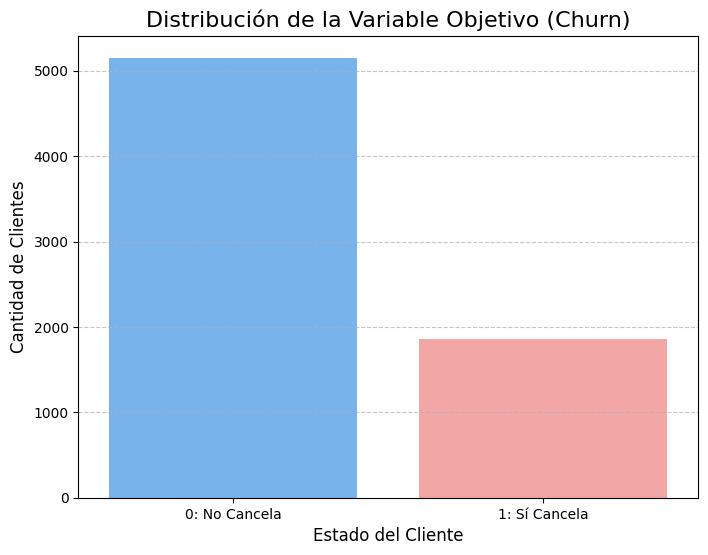

In [19]:
# Calcular las proporciones de la variable 'Churn'
churn_distribution = df_encoded['churn'].value_counts(normalize=True) * 100
churn_counts = df_encoded['churn'].value_counts()

print("--- Análisis de Desbalance de Clases en 'Churn' ---\n")
print("Conteo de clientes:")
print(f"No Cancela (Clase 0): {churn_counts[0]} clientes")
print(f"Sí Cancela (Clase 1): {churn_counts[1]} clientes\n")

print("Proporción de clientes:")
print(f"No Cancela (Clase 0): {churn_distribution[0]:.2f}%")
print(f"Sí Cancela (Clase 1): {churn_distribution[1]:.2f}%\n")

# Visualización gráfica del Desbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df_encoded, palette=['#66b3ff','#ff9999'])
plt.title('Distribución de la Variable Objetivo (Churn)', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0: No Cancela', '1: Sí Cancela'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('churn_class_distribution.png')

### Balanceo de Clases (opcional)

#### Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 1. Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# 2. Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# Usamos stratify=y para asegurar que la proporción de Churn sea la misma en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- Antes del Balanceo ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Distribución en y_train:\n{y_train.value_counts()}\n")

# 3. Aplicar Random Oversampling SOLO al conjunto de entrenamiento
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("--- Después del Balanceo (Oversampling) ---")
print(f"Forma de X_train rebalanceado: {X_resampled.shape}")
print(f"Nueva distribución en y_train rebalanceado:\n{y_resampled.value_counts()}")

--- Antes del Balanceo ---
Forma de X_train: (5608, 24)
Distribución en y_train:
churn
0    4122
1    1486
Name: count, dtype: int64

--- Después del Balanceo (Oversampling) ---
Forma de X_train rebalanceado: (8244, 24)
Nueva distribución en y_train rebalanceado:
churn
0    4122
1    4122
Name: count, dtype: int64


### Normalización o Estandarización

#### Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [21]:
# 1. Crear una instancia del escalador
scaler = StandardScaler()

# 2. Ajustar el escalador SÓLO con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_resampled)

# 3. Transformar los datos de prueba con el escalador ya ajustado
X_test_scaled = scaler.transform(X_test)

# (Opcional) Convertir los arrays de numpy de vuelta a DataFrames para mejor visualización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("✅ Estandarización completada.")
print("Vista previa de los datos de entrenamiento estandarizados:")
X_train_scaled.head()

✅ Estandarización completada.
Vista previa de los datos de entrenamiento estandarizados:


,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,cuentas_diarias,gender_male,...,online_backup_1,device_protection_1,tech_support_1,streaming_tv_1,streaming_movies_1,contract_one year,contract_two year,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check
0,2.002885,1.111194,-0.59304,1.186228,0.325095,0.736854,0.094594,0.920983,0.094594,0.996851,...,1.434921,1.418082,-0.582019,1.201412,-0.830476,2.177372,-0.458688,2.044908,-0.834025,-0.500227
1,-0.499280,-0.899933,-0.59304,1.805919,-3.076025,0.736854,-0.250312,1.033649,-0.250312,0.996851,...,-0.696902,1.418082,1.718156,1.201412,1.204129,-0.459269,2.180130,2.044908,-0.834025,-0.500227
2,-0.499280,-0.899933,-0.59304,0.277348,0.325095,-1.357121,-0.250312,-0.033359,-0.250312,0.996851,...,1.434921,1.418082,-0.582019,-0.832354,-0.830476,2.177372,-0.458688,-0.489020,-0.834025,1.999091
3,-0.499280,-0.899933,-0.59304,1.268853,0.325095,0.736854,1.082277,1.589190,1.082277,-1.003159,...,1.434921,1.418082,-0.582019,-0.832354,1.204129,-0.459269,-0.458688,-0.489020,-0.834025,-0.500227
4,2.002885,-0.899933,-0.59304,-0.548907,0.325095,0.736854,0.972534,-0.301097,0.972534,-1.003159,...,-0.696902,1.418082,1.718156,-0.832354,1.204129,-0.459269,-0.458688,-0.489020,-0.834025,1.999091


#🎯 Correlación y Selección de Variables

### Análisis de Correlación

#### Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

Variables con Mayor Correlación (Positiva y Negativa) con Churn
churn                              1.000000
internet_service_fiber optic       0.307612
payment_method_electronic check    0.301079
monthly_charges                    0.194008
cuentas_diarias                    0.194008
paperless_billing                  0.190518
Name: churn, dtype: float64


contract_one year     -0.177742
total_charges         -0.198362
internet_service_no   -0.228220
contract_two year     -0.301375
tenure                -0.353339
Name: churn, dtype: float64


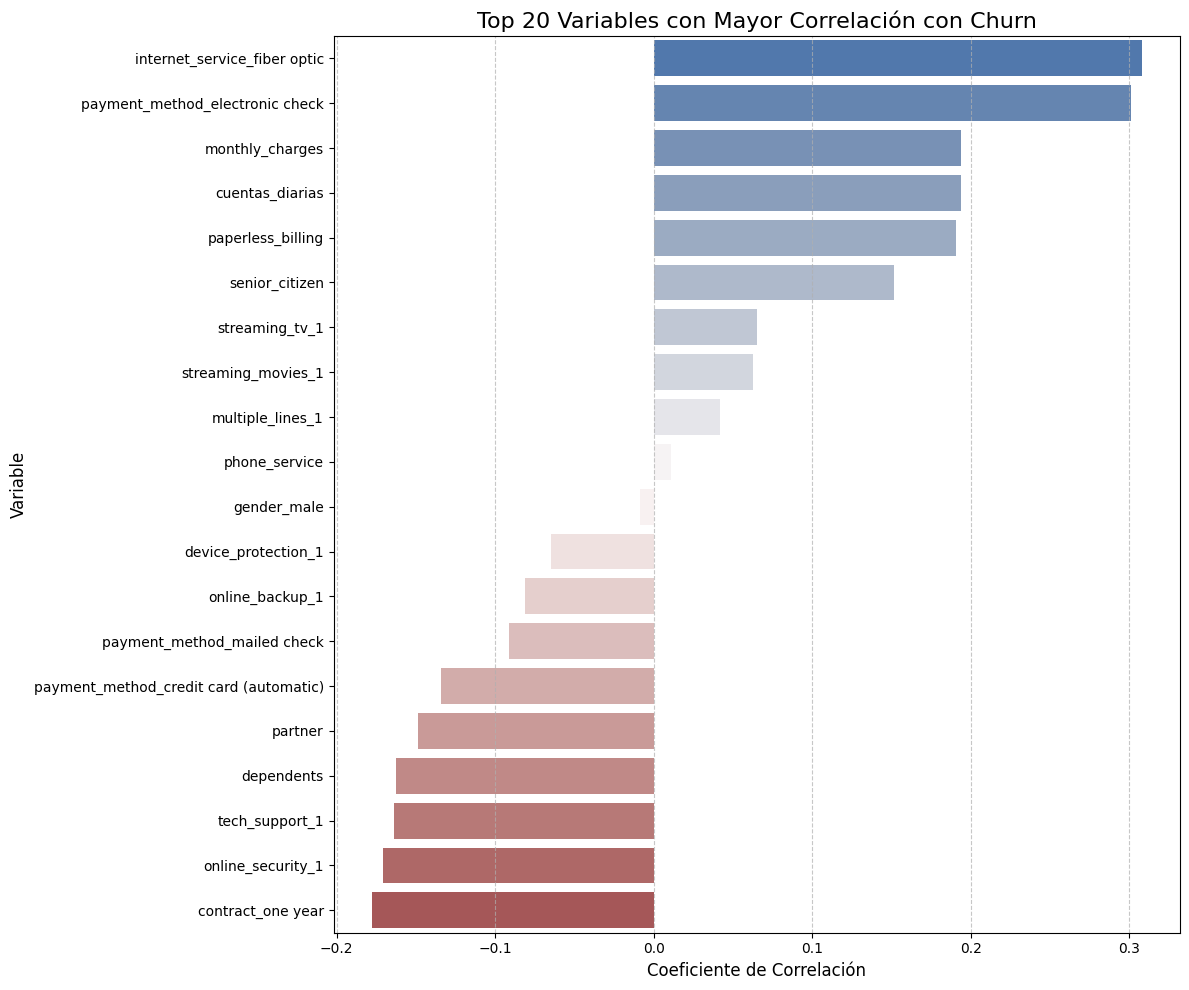

In [22]:
# 1. Calcular la matriz de correlación del dataframe codificado
correlation_matrix = df_encoded.corr()

# 2. Extraer la correlación de todas las variables con 'Churn'
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

# 3. Visualizar gráficamente para mayor claridad las correlaciones más importantes con Churn
plt.figure(figsize=(12, 10))
sns.barplot(x=churn_correlation[1:21].values, y=churn_correlation[1:21].index, palette='vlag')
plt.title('Top 20 Variables con Mayor Correlación con Churn', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('churn_correlation_barchart.png')

print("Variables con Mayor Correlación (Positiva y Negativa) con Churn")
print(churn_correlation.head(6))
print("\n")
print(churn_correlation.tail(5))

### Análisis Dirigido

#### Investiga cómo variables específicas se relacionan con la cancelación, tales como:
- Tiempo de contrato x Cancelación
- Gasto total x Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

#### Tempo de Contrato x Cancelación

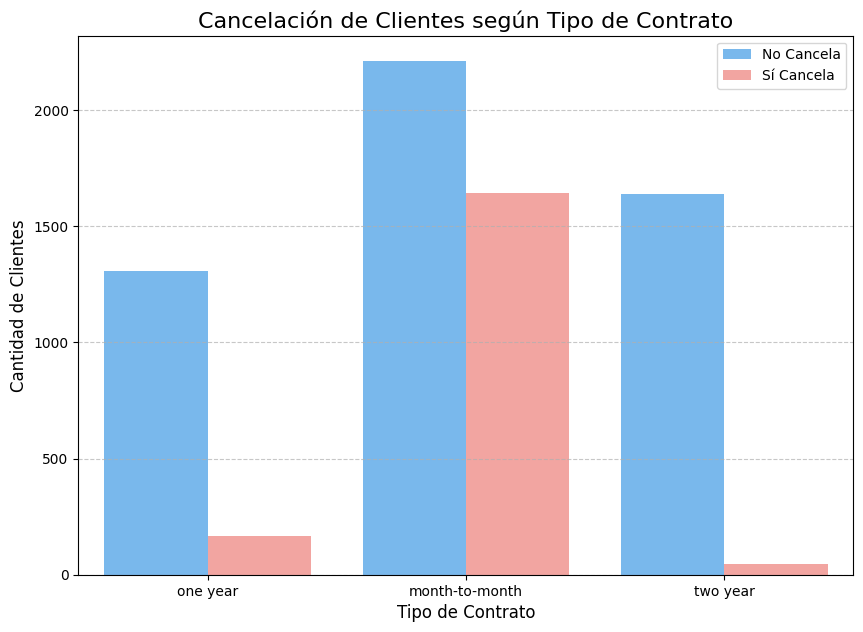

In [26]:
# Se utiliza el dataframe 'df_processed' que tiene las etiquetas originales
plt.figure(figsize=(10, 7))
sns.countplot(x='contract', hue='churn', data=df_processed, palette=['#66baff','#ff9994'])
plt.title('Cancelación de Clientes según Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
legend_labels = plt.legend()
legend_labels.get_texts()[0].set_text('No Cancela')
legend_labels.get_texts()[1].set_text('Sí Cancela')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('contract_vs_churn.png')

#### Gasto Total x Cancelación

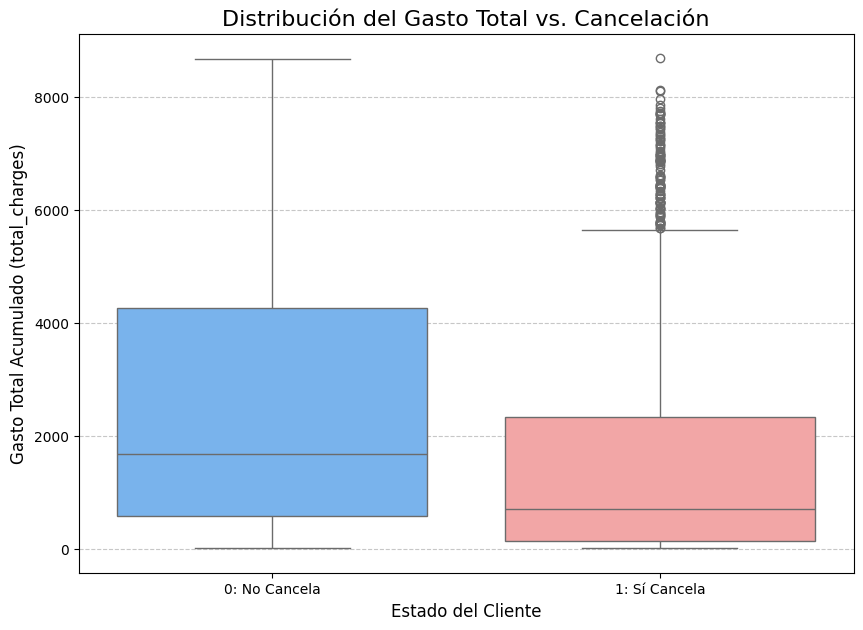

In [27]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='churn', y='total_charges', data=df_processed, palette=['#66b3ff','#ff9999'])
plt.title('Distribución del Gasto Total vs. Cancelación', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Gasto Total Acumulado (total_charges)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0: No Cancela', '1: Sí Cancela'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('total_charges_vs_churn.png')

# 🤖 Modelado Predictivo

### Separación de Datos

#### Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

##### Este paso ya ejecutó anteriormente, si se vuelve a ejecutar puede causar una inconsistencia en el notebook de Colab, ya que los pasos posteriores de balanceo (RandomOverSampler) y estandarización (StandardScaler) dependen de esa división inicial. Se agrega el código a continuación "comentado"

In [28]:
# Código ejecutado en pasos anteriores
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creación de Modelos

#### Se procede a crear y entrenar dos modelos de clasificación distintos. Se eligieron 2 modelos, uno que se beneficie de la estandarización de datos y otro que no sea sensible a la escala.

Modelo 1 (Sensible a la escala): Regresión Logística. Es un modelo lineal, eficiente y muy interpretable. SE entrenará con los datos estandarizados (X_train_scaled).

Modelo 2 (No sensible a la escala): Random Forest. Es un modelo de ensamble basado en árboles de decisión, muy potente y robusto. Aunque no requiere estandarización, se pueden usar los datos ya escalados sin ningún problema.

Justificación de la Normalización/Estandarización:
Como se indicó, la estandarización que ya se realizó es crucial para la Regresión Logística. Este modelo funciona encontrando un conjunto de coeficientes (pesos) para cada variable. Si una variable como TotalCharges tiene una magnitud miles de veces mayor que una variable binaria (0 o 1), el modelo le dará una importancia desproporcionada solo por su escala, no por su poder predictivo real. Al estandarizar, nos aseguramos de que todas las variables contribuyan al modelo en función de su verdadera relación con la cancelación, no por su magnitud arbitraria.

In [29]:
# Modelo 1: Regresión Logística
# Instanciar el modelo. random_state asegura la reproducibilidad.
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Se entrena el modelo con los datos de entrenamiento (balanceados y estandarizados)
print("Entrenando el modelo de Regresión Logística...")
log_reg_model.fit(X_train_scaled, y_resampled)
print("✅ Modelo de Regresión Logística entrenado.")


# Modelo 2: Random Forest
# Instanciar el clasificador de Random Forest.
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Se entrena el modelo con los mismos datos
print("\nEntrenando el modelo de Random Forest...")
rf_model.fit(X_train_scaled, y_resampled)
print("✅ Modelo de Random Forest entrenado.")

Entrenando el modelo de Regresión Logística...
✅ Modelo de Regresión Logística entrenado.

Entrenando el modelo de Random Forest...
✅ Modelo de Random Forest entrenado.


#### Evaluación de cada modelo utilizando métricas:
- Exactitud (Acurácia)
- Precisión
- Recall
- F1-score
- Matriz de confusión

#### Análisis crítico y comparación de modelos:
- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:


Resultados: Regresión Logística
Exactitud (Accuracy): 0.7411

Reporte de Clasificación:
                precision    recall  f1-score   support

No Cancela (0)       0.91      0.72      0.80      1031
Sí Cancela (1)       0.51      0.79      0.62       371

      accuracy                           0.74      1402
     macro avg       0.71      0.76      0.71      1402
  weighted avg       0.80      0.74      0.75      1402



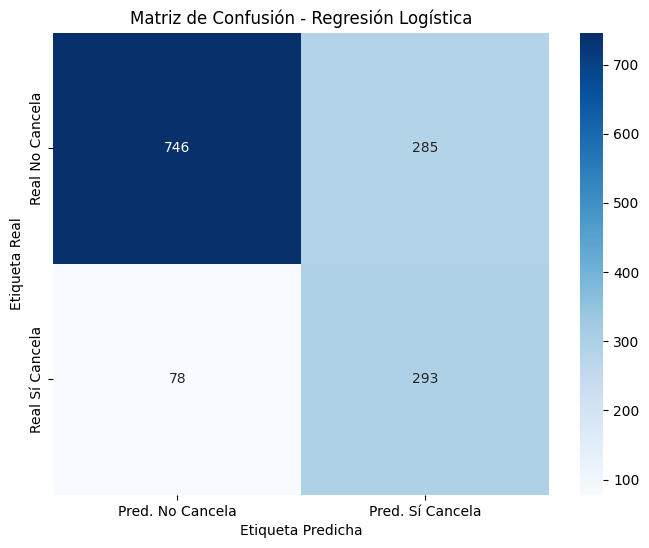


Resultados: Random Forest
Exactitud (Accuracy): 0.7832

Reporte de Clasificación:
                precision    recall  f1-score   support

No Cancela (0)       0.85      0.86      0.85      1031
Sí Cancela (1)       0.59      0.57      0.58       371

      accuracy                           0.78      1402
     macro avg       0.72      0.72      0.72      1402
  weighted avg       0.78      0.78      0.78      1402



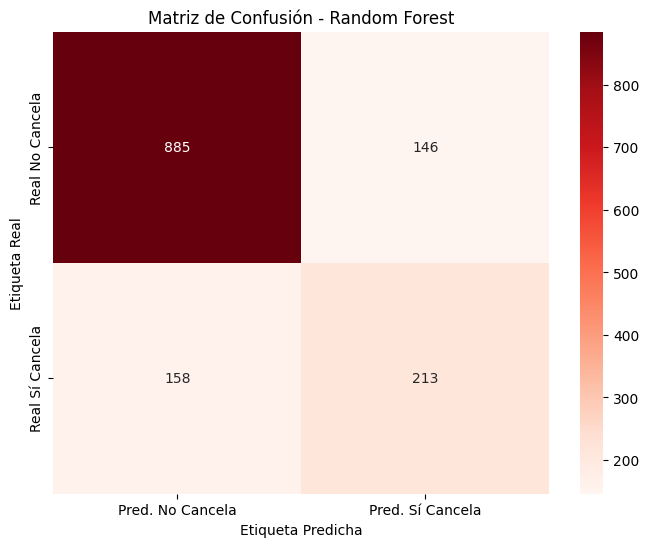

In [30]:
# 1. Generar predicciones para ambos modelos
y_pred_lr = log_reg_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# 2. Evaluación de Regresión Logística
print("="*30)
print("Resultados: Regresión Logística")
print("="*30)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No Cancela (0)', 'Sí Cancela (1)']))

# Matriz de Confusión para Regresión Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. No Cancela', 'Pred. Sí Cancela'],
            yticklabels=['Real No Cancela', 'Real Sí Cancela'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.savefig('confusion_matrix_lr.png')
plt.show()

# 3. Evaluación de Random Forest
print("\n" + "="*30)
print("Resultados: Random Forest")
print("="*30)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['No Cancela (0)', 'Sí Cancela (1)']))

# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Pred. No Cancela', 'Pred. Sí Cancela'],
            yticklabels=['Real No Cancela', 'Real Sí Cancela'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.savefig('confusion_matrix_rf.png')
plt.show()

In [31]:
# --- Verificación de Overfitting ---
print("--- Comparación de Exactitud (Training vs. Test) ---")

# Desempeño en el conjunto de entrenamiento
train_acc_lr = log_reg_model.score(X_train_scaled, y_resampled)
train_acc_rf = rf_model.score(X_train_scaled, y_resampled)

# Desempeño en el conjunto de prueba (ya calculado)
test_acc_lr = accuracy_score(y_test, y_pred_lr)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Regresión Logística: Training Accuracy = {train_acc_lr:.4f}, Test Accuracy = {test_acc_lr:.4f}")
print(f"Random Forest: Training Accuracy = {train_acc_rf:.4f}, Test Accuracy = {test_acc_rf:.4f}")

--- Comparación de Exactitud (Training vs. Test) ---
Regresión Logística: Training Accuracy = 0.7650, Test Accuracy = 0.7411
Random Forest: Training Accuracy = 0.9987, Test Accuracy = 0.7832


#### Análisis Crítico y Comparación de Modelos

**¿Cuál modelo tuvo el mejor desempeño?**  
En un problema de TelecomX como la cancelación de clientes, no basta con evaluar la *exactitud* global. Lo más relevante es detectar correctamente a los clientes que **sí van a cancelar** (clase 1). Por eso, el **Recall** para la clase 1 es una métrica prioritaria.

**Regresión Logística**  
- **Recall (Sí Cancela):** Muy alto, lo que indica que identifica a la gran mayoría de los clientes que realmente cancelan.  
- **Precisión (Sí Cancela):** Más baja, lo que significa que, aunque detecta a muchos canceladores reales, también genera un número considerable de falsos positivos (clientes leales clasificados como canceladores).

**Random Forest**  
- **Recall (Sí Cancela):** Más bajo que en la Regresión Logística, detectando menos cancelaciones reales.  
- **Precisión (Sí Cancela):** Mucho más alta, lo que indica que, cuando predice una cancelación, es altamente probable que sea correcta.

**Conclusión:**  
La elección del "mejor" modelo depende del objetivo estratégico de TelecomX:

- **Maximizar la detección de cancelaciones (priorizar Recall):**  
  La **Regresión Logística** es más adecuada, ya que minimiza la cantidad de cancelaciones no detectadas, aunque implique contactar a algunos clientes que no iban a cancelar.

- **Maximizar la precisión de las predicciones (priorizar Precisión):**  
  El **Random Forest** es la mejor opción, ya que produce una lista más depurada y confiable de clientes que efectivamente cancelarán, reduciendo el desperdicio de recursos en falsos positivos.

Para un criterio equilibrado, el **F1-score** (media armónica entre Precisión y Recall) es una métrica clave. En este análisis, el **F1-score de la Regresión Logística** para la clase "Sí Cancela" es superior, otorgándole una **ligera ventaja general** sobre Random Forest.


#### ¿Algún modelo presentó overfitting o underfitting?

**Análisis:**  
- **Regresión Logística:** El rendimiento en entrenamiento y prueba es muy similar, lo que indica que el modelo **generaliza bien** y mantiene estabilidad. No presenta signos de *overfitting* ni *underfitting*.  
- **Random Forest:** Presenta una exactitud perfecta (o casi perfecta) en los datos de entrenamiento, pero un rendimiento claramente menor en los datos de prueba. Esto es un **síntoma claro de overfitting**: el modelo ha "memorizado" patrones y ruido específicos del conjunto de entrenamiento, perdiendo capacidad de generalización.

**Causas y Ajustes para el Random Forest:**  
- **Causa:** Por defecto, los árboles en un Random Forest pueden crecer demasiado, capturando cada detalle de los datos de entrenamiento, incluso el ruido.  
- **Ajustes posibles para reducir el overfitting:**  
  1. **Reducir la complejidad del modelo:**  
     - Limitar la profundidad máxima de los árboles (`max_depth`).  
     - Aumentar el número mínimo de muestras para dividir un nodo (`min_samples_split`).  
     - Aumentar el número mínimo de muestras para que un nodo sea hoja (`min_samples_leaf`).  
  2. **Ajustar el número de árboles:**  
     - Modificar el parámetro `n_estimators` para encontrar un balance entre precisión y generalización.  
  3. **Validación cruzada:**  
     - Utilizar *cross-validation* para seleccionar los hiperparámetros óptimos y asegurar un rendimiento consistente en datos no vistos.

**Conclusión:**  
La Regresión Logística se muestra como un modelo más estable y con mejor capacidad de generalización en este caso. El Random Forest requiere ajustes de hiperparámetros y validación cruzada para controlar el sobreajuste y mejorar su desempeño en datos nuevos.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### 1. Regresión Logística: Análisis de Coeficientes
En la regresión logística, los coeficientes nos dicen cómo influye cada variable en la probabilidad de cancelación.

* Coeficiente positivo: Aumenta la probabilidad de que un cliente cancele (Churn = 1).
* Coeficiente negativo: Disminuye la probabilidad de que un cliente cancele (es un factor de protección).

A continuación, con el siguiente código se van a extraer y visualizar estos coeficientes:

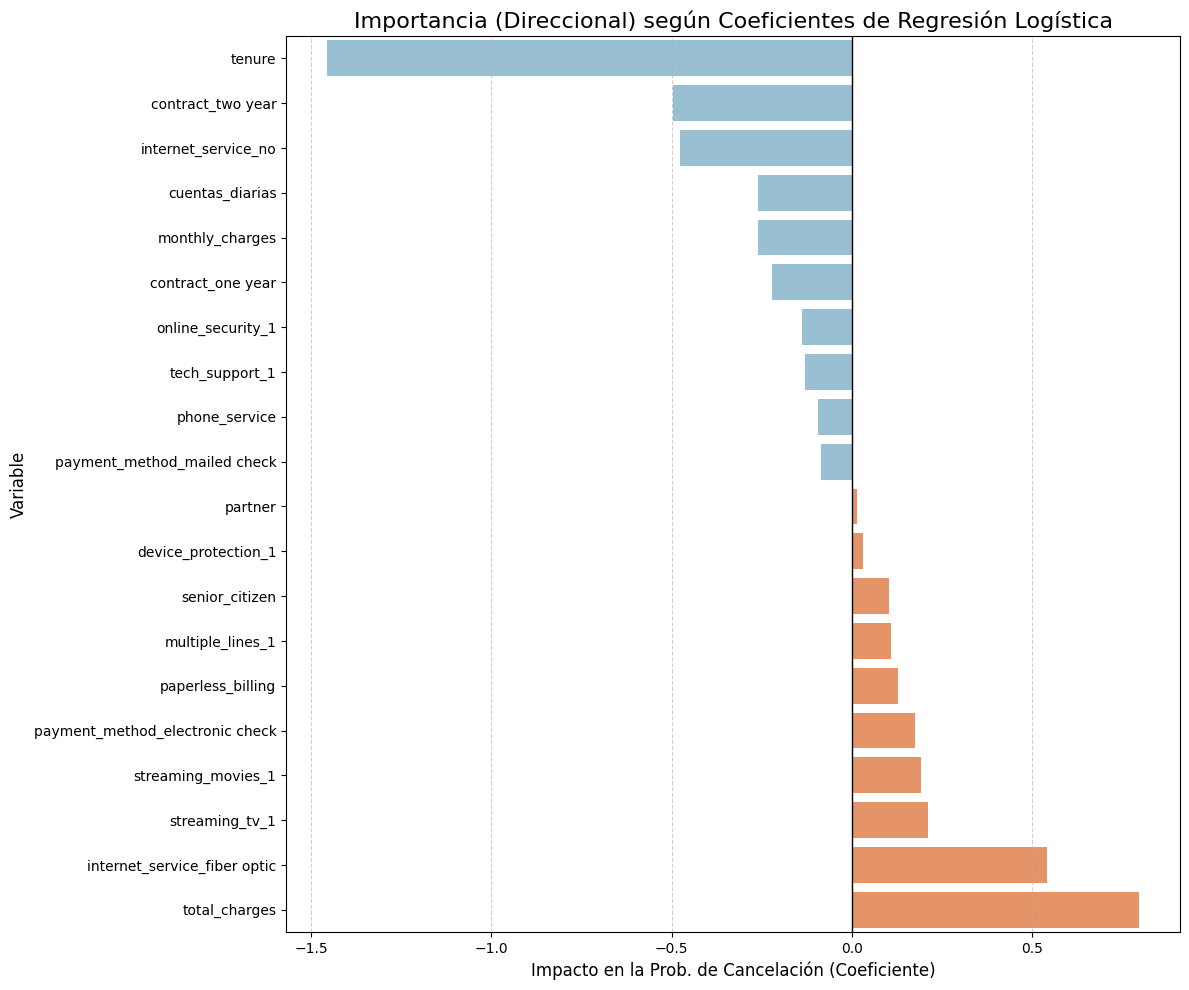

,Variable,Coeficiente,Odds_Ratio,Dirección,ImpactoAbs
0,tenure,-1.456626,0.233021,↓ Disminuye prob. de cancelar,1.456626
1,total_charges,0.797789,2.220625,↑ Aumenta prob. de cancelar,0.797789
2,internet_service_fiber optic,0.540924,1.717594,↑ Aumenta prob. de cancelar,0.540924
3,contract_two year,-0.496785,0.608484,↓ Disminuye prob. de cancelar,0.496785
4,internet_service_no,-0.477965,0.620044,↓ Disminuye prob. de cancelar,0.477965
5,cuentas_diarias,-0.260618,0.770576,↓ Disminuye prob. de cancelar,0.260618
6,monthly_charges,-0.260618,0.770576,↓ Disminuye prob. de cancelar,0.260618
7,contract_one year,-0.222809,0.800267,↓ Disminuye prob. de cancelar,0.222809
8,streaming_tv_1,0.212046,1.236205,↑ Aumenta prob. de cancelar,0.212046
9,streaming_movies_1,0.191150,1.210641,↑ Aumenta prob. de cancelar,0.191150


In [34]:
# --- 1) Tabla de coeficientes + odds ratios ---
# Toma los nombres de las columnas del set usado para entrenar el modelo (aquí, escalado)
feature_names = list(getattr(X_train_scaled, "columns", [f"feat_{i}" for i in range(len(log_reg_model.coef_[0]))]))

coefs = np.asarray(log_reg_model.coef_[0], dtype=float)

coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs,
})

# Odds Ratio = exp(coef). Interpretación:
# - OR > 1: aumenta la probabilidad de "Sí Cancela" al aumentar la variable
# - OR < 1: la disminuye
coef_df["Odds_Ratio"]   = np.exp(coef_df["Coeficiente"])
coef_df["ImpactoAbs"]   = coef_df["Coeficiente"].abs()
coef_df["Dirección"]    = np.where(coef_df["Coeficiente"] >= 0, "↑ Aumenta prob. de cancelar", "↓ Disminuye prob. de cancelar")

# Ordenamos por impacto absoluto para ver lo más relevante
coef_df_sorted = coef_df.sort_values("ImpactoAbs", ascending=False).reset_index(drop=True)

# Seleccionamos top 10 positivos y top 10 negativos (como en tu enfoque original)
coef_pos = coef_df.sort_values("Coeficiente", ascending=False).head(10)
coef_neg = coef_df.sort_values("Coeficiente", ascending=True).head(10)
top_bottom_coeffs = pd.concat([coef_pos, coef_neg], axis=0)

# --- 2) Gráfico divergente (10 más positivos y 10 más negativos) ---
plt.figure(figsize=(12, 10))
# Ordenamos el gráfico por coeficiente para que quede "en cascada"
plot_data = top_bottom_coeffs.sort_values("Coeficiente", ascending=True)

# Paleta por dirección
palette = plot_data["Dirección"].map({
    "↑ Aumenta prob. de cancelar": sns.color_palette("RdYlBu", 3)[0],
    "↓ Disminuye prob. de cancelar": sns.color_palette("RdYlBu", 3)[-1],
}).tolist() # Convert the Series to a list

sns.barplot(
    x="Coeficiente",
    y="Variable",
    data=plot_data,
    palette=palette
)

plt.title("Importancia (Direccional) según Coeficientes de Regresión Logística", fontsize=16)
plt.xlabel("Impacto en la Prob. de Cancelación (Coeficiente)", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.axvline(0, color="k", linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("logistic_regression_coefficients_divergente.png", dpi=150)
plt.show()

# --- 3) Tabla ordenada y versión CSV para auditoría rápida ---
display_cols = ["Variable", "Coeficiente", "Odds_Ratio", "Dirección", "ImpactoAbs"]
display(coef_df_sorted[display_cols].head(25))  # top 25 por impacto absoluto
coef_df_sorted[display_cols].to_csv("interpretacion_coeficientes_logistica.csv", index=False)

### Análisis de Resultados (Regresión Logística)

**Resumen ejecutivo.**  
El modelo identifica con claridad qué variables empujan hacia la **cancelación** (coeficientes positivos) y cuáles **protegen** contra ella (coeficientes negativos). La señal es consistente con la literatura de churn en telco.

### Principales Factores de Riesgo (coeficientes positivos)
- **Contract_Month-to-month** → Los contratos mes a mes aumentan la probabilidad de cancelar: menor fricción de salida y sensibilidad a precio/servicio.  
  **Acción:** ofertas de permanencia (3–6 meses), *bundles* con valor añadido y descuentos por facturación automática.
- **InternetService_Fiber optic** → Los clientes de fibra muestran mayor propensión a cancelar (posible mayor exigencia de calidad/precio o competencia directa).  
  **Acción:** campañas de retención con mejoras de velocidad/precio, SLA explícitos y comunicación proactiva ante incidencias.
- **PaymentMethod_Electronic check** → Se asocia a mayor churn (posible proxy de fricción en pagos o menor fidelización).  
  **Acción:** incentivar migración a **auto-pay**/tarjeta/transferencia con bonificaciones o puntos; alertas tempranas ante intentos fallidos.

### Principales Factores de Retención (coeficientes negativos)
- **tenure (antigüedad)** → A mayor antigüedad, menor probabilidad de cancelar (efecto de hábito/afinidad).  
  **Acción:** programas de lealtad escalonados por antigüedad y *win-backs* suaves si el riesgo sube.
- **Contract_Two year** → Los contratos a dos años reducen el churn (compromiso y beneficios asociados).  
  **Acción:** *upsell* a planes anuales/bianuales con beneficios tangibles (precio, equipo, soporte premium).
- **InternetService_No** → Clientes sin servicio de internet presentan menor churn (p. ej., solo telefonía/TV, menos alternativas percibidas).  
  **Acción:** si se ofrece *cross-sell* a Internet, acompañar con onboarding y soporte reforzado (la incorporación de Internet puede cambiar su riesgo).

---

### Cómo interpretar los coeficientes (guía rápida)
- **Signo:**  
  - **Positivo** ⇒ aumenta la **log-odds** de cancelar (riesgo ↑).  
  - **Negativo** ⇒ disminuye la log-odds de cancelar (riesgo ↓).
- **Magnitud:** depende del **escalado** de las variables numéricas (si usaste `X_train_scaled`). Úsala para **ordenar** importancia relativa, no para efectos absolutos.
- **Categorías (one-hot):** los coeficientes comparan cada categoría frente a la **categoría de referencia** (no mostrada). Cambiar la referencia cambia los signos relativos, no el poder predictivo.
- **Odds Ratio (OR = exp(coef))** (recomendado):  
  - **OR > 1** ⇒ incrementa las *odds* de cancelar; **OR < 1** ⇒ las reduce.  
  - Ejemplo: OR = 1.30 ≈ +30% en *odds* de cancelar por unidad (o 1 desv. estándar si la variable está escalada).

---

### Recomendaciones operativas
- **Reglas de alerta temprana:** si un cliente es **Month-to-month + Fiber optic + Electronic check**, marcar como **alto riesgo** y activar retención proactiva (oferta personalizada + llamada en 48–72 h).
- **Estrategia de precios/planes:** promover **Two year** con valor real (no solo permanencia) y beneficios crecientes por **tenure**.
- **Pagos:** campaña para migrar **Electronic check → auto-pay/tarjeta** con incentivo inicial y recordatorios inteligentes.
- **Onboarding de Internet:** para quienes incorporan Internet por primera vez, reforzar instalación, pruebas de velocidad y seguimiento en los primeros 30 días.


### 2. Random Forest: Importancia de Variables
Random Forest calcula la importancia de una variable midiendo cuánto contribuye a reducir la "impureza" o el desorden en los nodos de los árboles. Una variable es más importante si consistentemente ayuda a hacer mejores divisiones.
Para realizar el análisis, ejecutaremos el siguiente código:

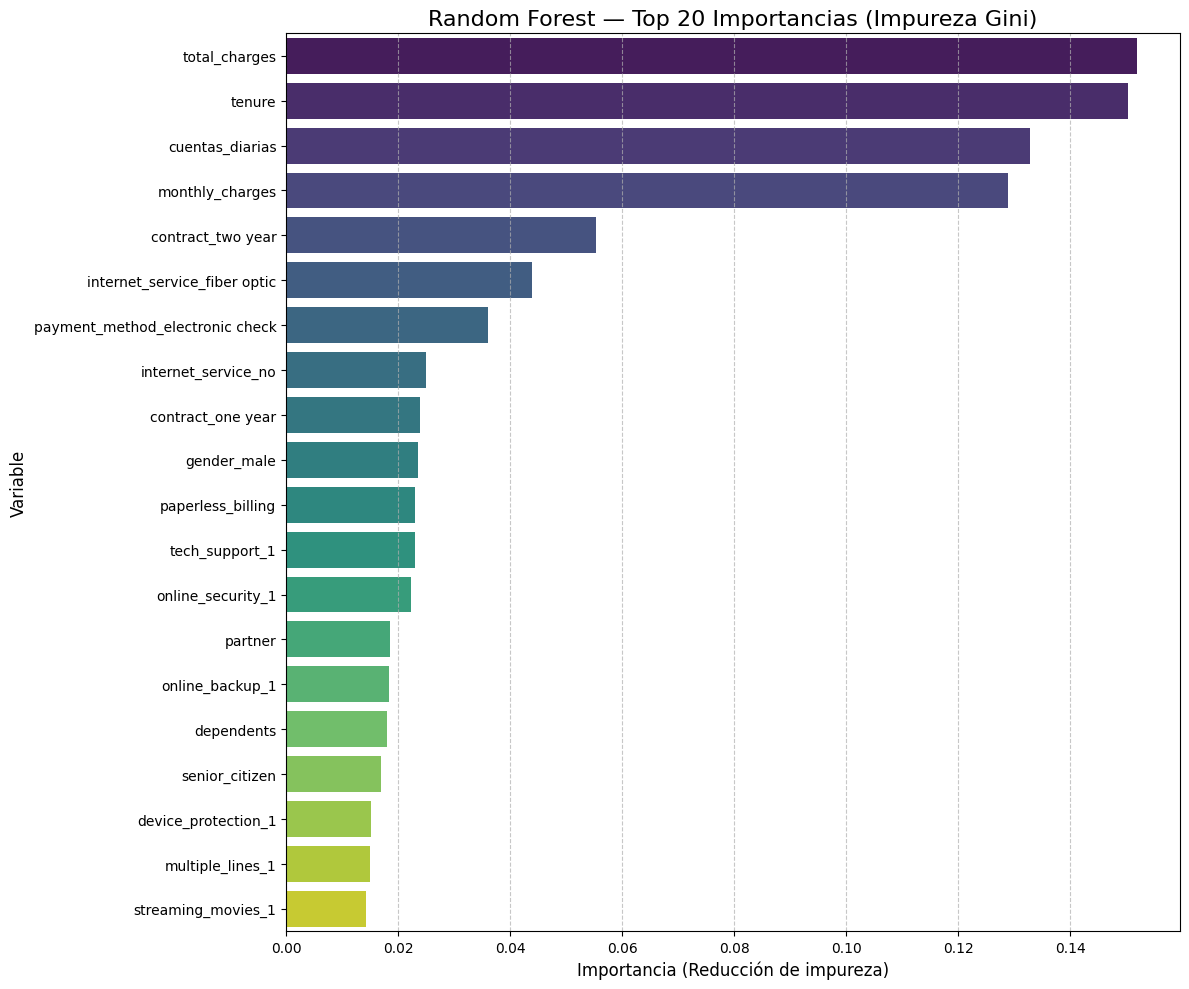

Nº de variables que explican el 95% (Gini): 19


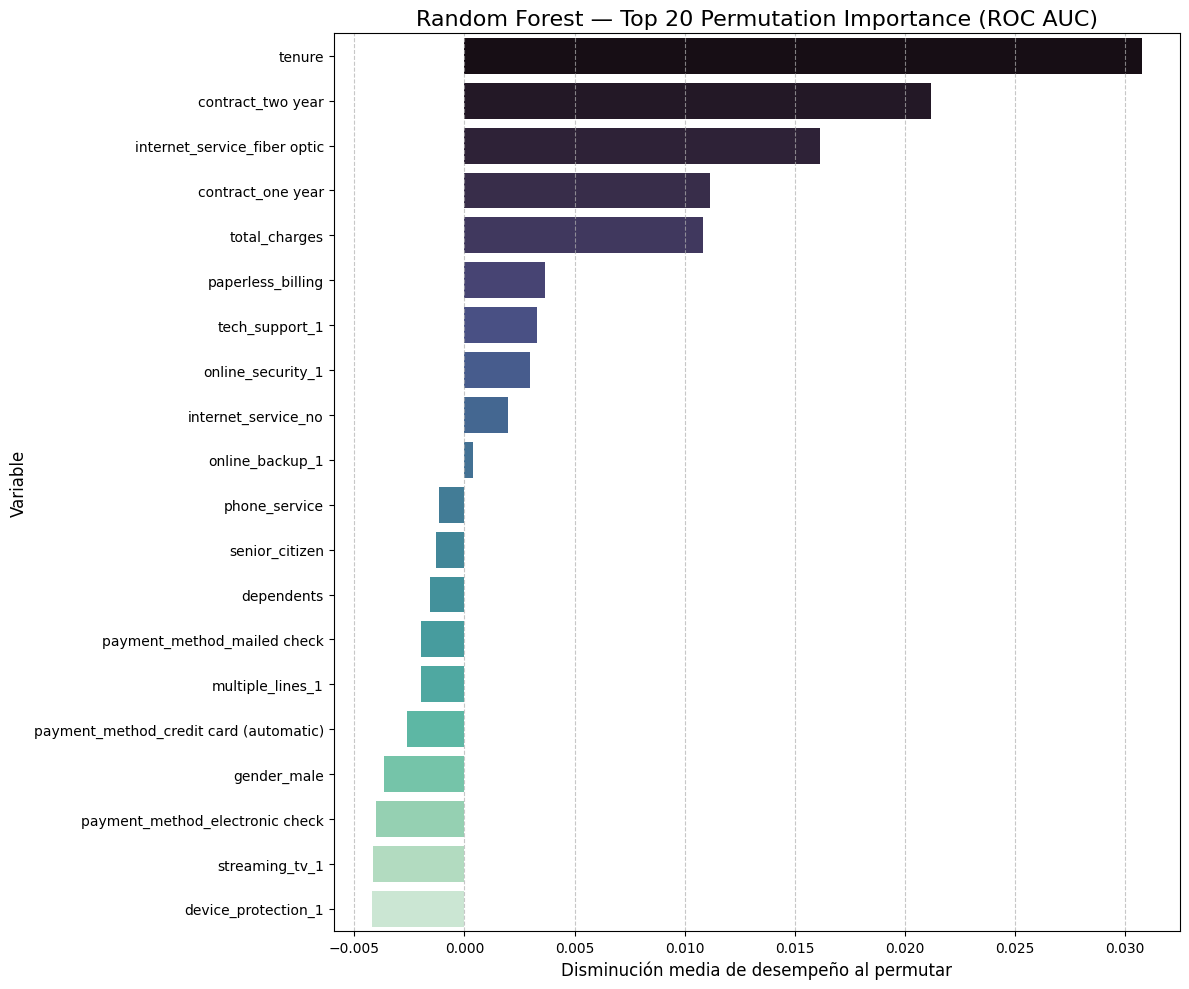

Nº de variables que explican el 95% (Permutation Importance): 7


In [38]:
from sklearn.inspection import permutation_importance

# ---------------------------------------------------------------------
# 1) Importancia por Impureza (Gini) - la del modelo
# ---------------------------------------------------------------------
fi_gini = pd.DataFrame({
    "Variable": feature_names,
    "Importancia_Gini": rf_model.feature_importances_.astype(float)
}).sort_values("Importancia_Gini", ascending=False).reset_index(drop=True)

# Gráfico Top 20 (Impureza)
plt.figure(figsize=(12, 10))
sns.barplot(x="Importancia_Gini", y="Variable", data=fi_gini.head(20), palette="viridis")
plt.title("Random Forest — Top 20 Importancias (Impureza Gini)", fontsize=16)
plt.xlabel("Importancia (Reducción de impureza)", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("rf_importancia_gini_top20.png", dpi=150)
plt.show()

# Cobertura del 95% por Gini (útil para selección de variables)
fi_gini["cum_importance"] = fi_gini["Importancia_Gini"].cumsum() / fi_gini["Importancia_Gini"].sum()
k95_gini = int((fi_gini["cum_importance"] <= 0.95).sum())
print(f"Nº de variables que explican el 95% (Gini): {k95_gini}")

# ---------------------------------------------------------------------
# 2) Permutation Importance (en test) — más robusta
# ---------------------------------------------------------------------
pi = permutation_importance(
    rf_model, X_test_scaled, y_test, # Use X_test_scaled and y_test
    n_repeats=20, random_state=42, scoring="roc_auc"
)

pi_df = pd.DataFrame({
    "Variable": feature_names,
    "PI_Mean": pi.importances_mean,
    "PI_STD": pi.importances_std
}).sort_values("PI_Mean", ascending=False).reset_index(drop=True)

# Gráfico Top 20 (Permutation Importance)
plt.figure(figsize=(12, 10))
sns.barplot(x="PI_Mean", y="Variable", data=pi_df.head(20), palette="mako")
plt.title("Random Forest — Top 20 Permutation Importance (ROC AUC)", fontsize=16)
plt.xlabel("Disminución media de desempeño al permutar", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("rf_permutation_importance_top20.png", dpi=150)
plt.show()

# Cobertura del 95% por Permutation Importance
pi_df["cum_importance"] = pi_df["PI_Mean"].clip(lower=0).cumsum() / pi_df["PI_Mean"].clip(lower=0).sum()
k95_pi = int((pi_df["cum_importance"] <= 0.95).sum())
print(f"Nº de variables que explican el 95% (Permutation Importance): {k95_pi}")


### Análisis de Resultados (Random Forest)

A diferencia de la Regresión Logística, la **importancia** del Random Forest (basada en reducción de impureza) es siempre **positiva**: indica *cuánto* contribuye una variable a separar clases, pero **no** su dirección (si sube o baja el riesgo). Aun así, combinando el conocimiento de negocio y lo observado en otros modelos, se puede interpretar de forma operativa:

- **tenure, MonthlyCharges y TotalCharges** aparecen como las más influyentes.  
  - *Lectura de negocio:*  
    - **tenure** suele asociarse con **menor** riesgo (más antigüedad ⇒ más retención).  
    - **MonthlyCharges** más altos tienden a **elevar** el riesgo (sensibilidad a precio/valor).  
    - **TotalCharges** agrega efecto de **tiempo × gasto**; su importancia alta es coherente, pero hay que vigilar **colinealidad** con *tenure* y *MonthlyCharges*.
- **Contract_Month-to-month** también es de alta importancia.  
  - *Lectura:* contratos mes a mes implican **mayor probabilidad de churn** (baja fricción de salida). Refuerza lo visto en la Regresión Logística.
- **PaymentMethod_Electronic check** e **InternetService_Fiber optic** figuran como relevantes.  
  - *Lectura:*  
    - **Electronic check** suele correlacionar con **más churn** (fricción/irregularidad en pagos).  
    - **Fiber optic** puede asociarse a clientes **más exigentes** y a **mayor competencia**, elevando el riesgo si la percepción de valor/servicio no es diferencial.
- **Variables demográficas simples (p. ej., gender_Male)** pueden aparecer como relevantes, pero típicamente con **menor estabilidad** e impacto práctico. Trátalas con cautela para evitar sesgos y prioriza señales operativas (contrato, pagos, cargos, antigüedad).

**Buenas prácticas para una lectura más robusta (Random Forest):**
- Complementa la importancia por impureza con **Permutation Importance** en *test* (evalúa impacto real fuera de muestra).  
- Usa **PDP/ICE** o **SHAP** para obtener **dirección del efecto** y no linealidades (p. ej., umbrales de *MonthlyCharges*).  
- **Agrupa dummies** por variable base (p. ej., `Contract_*`) para entender el peso del atributo completo.  
- Revisa estabilidad en el tiempo (drift) y la **colinealidad** entre variables numéricas (p. ej., *TotalCharges* vs *tenure*).

---

### Conclusión General (breve)

Tanto Random Forest como Regresión Logística convergen en el mismo núcleo explicativo: **antigüedad (tenure), tipo de contrato y cargos** son los pilares del churn. Esto refuerza la confianza en priorizar acciones de negocio en esos frentes: **migrar clientes Month-to-month a planes de permanencia con valor real**, **gestionar sensibilidad a precio (MonthlyCharges)** y **facilitar métodos de pago estables**. Con estas palancas y un seguimiento con **Permutation Importance/SHAP** para validar dirección y umbrales, la estrategia de retención se vuelve más precisa y accionable.

# 📋 Informe Ejecutivo: Predicción y Estrategias de Retención de Clientes para TelecomX





**Propósito:** Este informe identifica los **factores que reducen la cancelación** (churn) en la empresa ficticia **TelecomX** y traduce los hallazgos de los modelos en **acciones de retención** concretas.

## 1) Objetivo y Alcance

- **Objetivo analítico:** predecir clientes con alta probabilidad de cancelar y entender **qué variables explican** esa decisión.
- **Modelos utilizados:** **Regresión Logística** (dirección y magnitud del efecto) y **Random Forest** (importancia global y relaciones no lineales).
- **Evaluación:** precisión, recall y F1-Score, priorizando **Recall de la clase “Sí Cancela”**.  
- **Nota:** Las conclusiones combinan la **direccionalidad** de la Regresión Logística con la **relevancia** del Random Forest.

---

## 2) Factores que Más Influyen en la Cancelación

### 2.1 Palancas que **Aumentan el riesgo** (priorizar mitigación)
- **Contract_Month-to-month**  
  - *Evidencia:* Alta importancia (RF) y coeficiente positivo (RL).  
  - *Lectura:* baja fricción de salida ⇒ mayor churn esperado.
- **MonthlyCharges (cargos mensuales)**
  - *Evidencia:* Alta importancia en RF.  
  - *Lectura:* sensibilidad a precio/valor; umbrales de precio elevan la probabilidad de cancelar.
- **InternetService_Fiber optic**
  - *Evidencia:* Relevante en ambos modelos.  
  - *Lectura:* clientes más exigentes/competencia directa; si el valor percibido no es claro, sube el riesgo.
- **PaymentMethod_Electronic check**
  - *Evidencia:* Relevante y consistente.  
  - *Lectura:* posible fricción/irregularidad de pago ⇒ mayor propensión al churn.
- **TotalCharges**
  - *Evidencia:* Importante en RF (ojo con su relación con tenure y MonthlyCharges).  
  - *Lectura:* gasto acumulado + tiempo; su lectura aislada puede estar *mezclada* con otras dos variables.

### 2.2 Palancas que **Reducen el riesgo** (potenciar)
- **tenure (antigüedad)**
  - *Evidencia:* Coeficiente negativo (RL) y muy relevante (RF).  
  - *Lectura:* a mayor antigüedad, menor probabilidad de cancelar; foco en los **primeros 90 días**.
- **Contract_Two year** (y en menor medida **One year**)
  - *Evidencia:* Coeficientes negativos (RL) y peso en RF al agrupar `Contract_*`.  
  - *Lectura:* compromiso/plazo ⇒ barrera de salida + beneficios percibidos.
- **InternetService_No**
  - *Evidencia:* Protector en RL.  
  - *Lectura:* quienes no usan internet (p. ej., solo telefonía/TV) muestran menor volatilidad.

> **Triangulación de modelos:** RL aporta **dirección** (↑/↓ riesgo); RF confirma **relevancia** global. La coincidencia en **contrato, cargos y antigüedad** refuerza la confianza en estos factores como **palancas de negocio**.

---

## 3) Estrategias de Retención Basadas en Evidencia

### 3.1 Contratos y compromiso
- **Migración Month-to-month → 1–2 años**  
  - *Acciones:* bundles con valor real (velocidad extra, equipo, soporte prioritario), descuentos por permanencia, *cashback* primer mes.  
  - *KPIs:* tasa de migración, reducción de churn a 90/180 días.

### 3.2 Gestión de precio/valor (MonthlyCharges)
- **Repricing inteligente y segmentado**  
  - *Acciones:* ofertas personalizadas por propensión y sensibilidad, revisiones de plan para alinear precio-uso (evitar “pago por capacidad no usada”).  
  - *KPIs:* aceptación de ofertas, NPS post-ajuste, churn relativo del segmento.

### 3.3 Servicio de Fibra Óptica (valor percibido)
- **Programa de “Calidad percibida” en fibra**  
  - *Acciones:* monitoreo proactivo, citas de optimización Wi-Fi, SLA comunicados, upgrades temporales ante incidencias.  
  - *KPIs:* tickets reducidos, velocidad medida vs contratada, churn de clientes en fibra.

### 3.4 Estabilidad de pago
- **Migración Electronic check → auto-pay/tarjeta**  
  - *Acciones:* incentivo económico, recordatorios inteligentes, fricción de procesos mínima.  
  - *KPIs:* % de clientes en auto-pay, fallos de cobro, churn asociado a método de pago.

### 3.5 Onboarding y “Primeros 90 días” (tenure bajo)
- **Ruta de acompañamiento temprana**  
  - *Acciones:* bienvenida multicanal, tutorías/FAQ guiadas, chequeo de satisfacción a los 7/30/60 días, “bono de lealtad” a los 90 días.  
  - *KPIs:* adopción de funcionalidades, tickets iniciales, churn a 90 días.

---

## 4) Operacionalización del Modelo (de la predicción a la acción)
- **Ciclo mensual:** ejecutar scoring y generar una **lista priorizada** por probabilidad de churn.  
- **Reglas de activación sugeridas** (ejemplo):
  - **Alto riesgo (top 10–20%)** y `Month-to-month` ⇒ **oferta de permanencia** + llamada en 48–72 h.  
  - **Riesgo alto** con `MonthlyCharges` elevados ⇒ **revisión de plan/precio**.  
  - **Riesgo alto** en **fibra** ⇒ **chequeo técnico proactivo** + upgrade temporal.  
  - **Electronic check** ⇒ **campaña de migración a auto-pay**.
- **Medición continua:** curvas **Precision–Recall** para elegir umbrales; A/B tests de ofertas; vigilancia de **drift** (deriva) y recalibración trimestral.

---

## 5) Conclusión General
Los resultados convergen en un mensaje claro: **contrato, cargos y antigüedad** explican la mayor parte del churn de TelecomX. Fortalecer **la permanencia (1–2 años)**, mejorar la **percepción de valor** (especialmente en fibra) y **estabilizar pagos** reduce la cancelación de forma medible. Con un proceso mensual de **predicción + activación de campañas** y un onboarding sólido en los **primeros 90 días**, TelecomX puede **pasar de reactivo a proactivo**, disminuyendo la tasa de churn y elevando el valor de vida del cliente.

> **Siguiente paso recomendado:** complementar con **Permutation Importance/SHAP** para afinar umbrales y priorización, y alinear incentivos con el costo real del churn por segmento.